# Graph coloring problem
Given an undirected graph and a set of colors, color the graph so that adjacent nodes are different colors

Solved using Pyomo

In [2]:
# import necessary packages
import time
import numpy as np
import numpy.random as random

import dimod
import networkx as nx

from pyomo.environ import *
from pyomo.opt import SolverFactory

## Generate graph

50 133


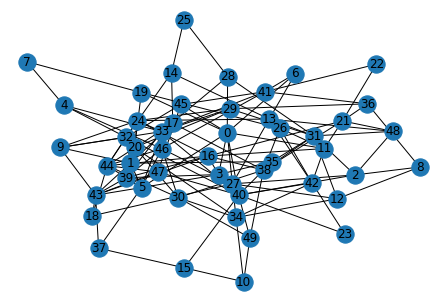

In [3]:
# number of colors
num_colors = 10

# graph = nx.Graph()
# graph.add_nodes_from([0,4])
# graph.add_edges_from([(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)])

# # graph.nodes.sort()
# print(type(graph.nodes))

# # house positions
# pos = {0: (0.5, 2.0), 1: (1, 1), 2: (1, 0), 3: (0, 0),  4: (0, 1)}

# nx.draw(graph, pos=pos, with_labels=True)

# generate random graph
# number of nodes
num_nodes = 50
# edge generation probability
p = 0.1
# seed (optional)
seed = 45
#generate graph
graph = nx.gnp_random_graph(num_nodes,p,seed)

# draw graph
nx.draw(graph, with_labels=True)

print(len(graph.nodes), len(graph.edges))

## Build problem model

In [4]:
# instantiate
model = ConcreteModel()

# define variables // pyomo indexes from 1
model.x = Var([i+1 for i in range(num_nodes*num_colors)], domain=Binary, bounds=(0,1))
# dictionary to assign node/color pairing to certain variable
var_dict = {}
i = 1
for n in graph.nodes:
    for c in range(num_colors):
        var_dict[(n+1,c+1)] = model.x[i]
        i += 1

# No objective
model.OBJ = Objective(expr = 0)

# Set constraints
# one-hot constraint
model.one_hot = ConstraintList()
for n in graph.nodes:
    model.one_hot.add(expr = sum(var_dict[(n+1,c+1)] for c in range(num_colors)) == 1)
    
# ajacent edge nodes constraint
model.adj = ConstraintList()
for n,m in graph.edges:
    for c in range(num_colors):
        model.adj.add(expr = var_dict[(n+1,c+1)] + var_dict[(m+1,c+1)] <= 1)
        
print(len(model.x))        

500


## Solve

In [5]:
instance = model.create_instance()
opt = SolverFactory('glpk')

results = opt.solve(model)
results.write()

    solver failure.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 1381
  Number of variables: 501
  Number of nonzeros: 3161
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.08300423622131348
# ----------------------------------------------------------
#   Solution Information
# -------------

## Solution

In [6]:
model.display()

Model unknown

  Variables:
    x : Size=500, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   1.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   0.0 :     1 : False : False : Binary
         14 :     0 :   0.0 :     1 : False : False : Binary
         15 :     0 :   0

## redraw graph

In [20]:
# colormap
colors = ['red', 'blue', 'green', 'orange', 'purple']
colormap = np.empty(len(graph.nodes), dtype=object)
for (n,c) in var_dict:
    if var_dict[(n,c)].value > 0.5:
        print(n-1,c-1)
        colormap[n-1] = colors[c-1]
        
sorted_nodes = np.array(sorted(graph.nodes))        
        
# draw graph
print('\n', graph.nodes, colormap)
nx.draw(graph, node_color=colormap, with_labels=True)

TypeError: '>' not supported between instances of 'NoneType' and 'float'